<a href="https://colab.research.google.com/github/AimanAminuddin/Image-Classifier/blob/main/LFGS%20and%20Newton's%20Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Composition of Convex Functions**

---
Consider $F:R^{p}→R$  a (smooth) convex function and  $𝐺:R→R$  another (smooth) convex function.



1.   Prove that the function x ↦ G(F(x)) is not necessary convex 
2.   Prove that if G is increasing, then $G(F(x))$ is necesarily convex. (this result is often used in the case when $G(x) = \exp(x)$. 



1.   If $G(x) = x^{2}$ and $F(x) = -\log(x)$. Then, both are strictly convex. However, $G(F(x)) = (-\log(x))^{2} = \log^{2}(x)$. Let $H(x) = G(F(x))$. Then, $H'(x) = \frac{2\log x}{x}$ and $H''(x) = \frac{2(1-\log(x))}{x^{2}}$. If $x > e$, then $H''(x) < 0$. Thus, $H(x)$ is not convex.
2.   Suppose that G is an increasing convex function. Let $H(x) = G(F(x))$. Let $w = \lambda x + (1-\lambda)y$ for $\lambda \in [0,1]$. It is easy to see that 
\begin{equation}
F(w) = F(\lambda x + (1-\lambda)y) \leq \lambda F(x) + (1-\lambda)F(y) 
\end{equation}
as F is convex. Since G is increasing, we have that for $x\leq y$, then $G(x) \leq G(y)$. Then, observe that 
\begin{equation}
H(w) = G(F(\lambda x + (1-\lambda)y) \leq G(\lambda F(x) + (1-\lambda)F(y)) \leq \lambda G(F(x)) + (1-\lambda)G(F(y)) 
\end{equation} 
We have that $H(\lambda x + (1-\lambda y)) \leq \lambda H(x) + (1-\lambda)H(y)$



**Newton's method on a quadratic function**

---
Consider  𝑆  a symmetric positive definite matrix and the function
$𝐹(𝑥)=\frac{1}{2}\langle 𝑥,𝑆𝑥\rangle$. Write down what the Newton's iteration is and prove that with a learning rate  $\eta=1$ , the Newton method converges in only one step!


Newton Method is $x_{k+1}=x_{k} -\eta_{k}H_{k}^{-1}\nabla F(x_{k})$. Suppose that $\eta_{k} = 1,\forall k$. Then, we have that $\nabla F(x) = Sx$ and $H_{F}(x_{k}) = S$. We have that 
\begin{equation}
x_{1} = x_{0} - S^{-1}Sx_{0} = x_{0}-x_{0} = 0,\forall x_{0} \in R^{d} 
\end{equation}
Hence, Newton Method converges exactly to global minimum in 1 iteration. 

1 dimension Example


---
Consider the function  $𝑓:R\rightarrow R$  defined as  $𝑓(𝑥)=𝑥^{2𝑝}$  for some integer  $𝑝\geq1$ . Write down what the Newton iteration is.

The first derivative is $f'(x) = 2p(x^{2p-1})$. The second derivative is $f''(x) = 2p(2p-1)x^{2p-2}$. Hence, the Newton Iteration is 
\begin{equation}
x_{k+1} = x_{k}-\frac{\eta_{k}f'(x_{k})}{f''(x_{k})} = x_{k}-\frac{2\eta_{k}px_{k}^{2p-1}}{2p(2p-1)x_{k}^{2p-2}} = x_{k} - \frac{\eta_{k}x_{k}}{2p-1} = \left(1-\frac{\eta_{k}}{2p-1}\right)x_{k}
\end{equation}

**Newton's Method Invariance**

---

Consider an invertible matrix $A \in R^{p\times p}$. Newton’s method is invariant with respect to change of coordinate. In other words, if  {𝑥𝑛}𝑛≥0  is the trajectory of the Newton method when minimizing a strictly convex function  $𝐹:ℝ^{p}→ℝ$  started at  $x_{0}$, and  $\{𝑦_{𝑛}\}_{𝑛≥0}$  is the trajectory of the Newton method when minimizing  $𝐺(𝑦)=𝐹(𝐴𝑦)$  started at  $𝑦_{0}= A^{-1}x_{0}$ then we have that  $𝑦_{𝑛}=𝐴^{−1}𝑥_{𝑛},\forall n \geq 1$. 

Observe that \begin{align}
    y_{1} &= y_{0}-\eta_{0}H_{0}^{-1}\nabla G(y_{0}) \\ 
    &= A^{-1}x_{0}-\eta_{0}(A^{T}H_{F}(AA^{-1}x_{0})A)^{-1}A^{T}\nabla F(AA^{-1}x_{0}) \\
    &= A^{-1}x_{0}-\eta_{0}A^{-1}H_{F}(x_{0})^{-1}(A^{T})^{-1}A^{T}\nabla F(x_{0}) \\ 
    &= A^{-1}(x_{0}-\eta_{0}H_{F}(x_{0})^{-1}\nabla F(x_{0})) \\ 
    &= A^{-1}x_{1} \\ 
\end{align}
We repeat this argument for $i=2,\dots,n$. Hence, we have $y_{n} = A^{-1}x_{n}$.

Generate  $𝑆= I_{d} +𝑅𝑅^{T}$  where  $𝑅 \in ℝ^{10\times 10}$  is a random matrix of your choice. Implement the Newton's method for minimizing the function
$𝐹(x)=\log(1+exp(⟨𝑥,𝑆𝑥⟩))$

In [ ]:
import numpy as np 
import pylab as plt 
import jax 
import jax.numpy as jnp 

In [ ]:
d = 10 
R = np.random.normal(0,1,size = (d,d))
S = np.eye(10) + R@R.T 
S

**Plot eigenvalues**

In [ ]:
eigenvalues,eigenvectors = np.linalg.eigh(S)

In [ ]:
print(min(eigenvalues))
print(max(eigenvalues))

1.0002571898204629
29.264007712643277


Text(0.5, 1.0, 'Eigenvalues of S')

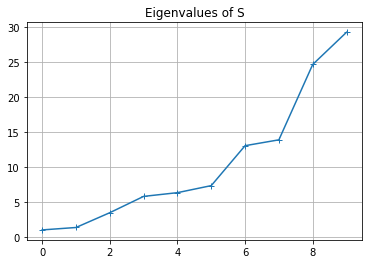

In [ ]:
plt.plot(eigenvalues,"-+")
plt.grid(True)
plt.title("Eigenvalues of S")

In [ ]:
# Function you want to minimize 
def F(x):
  return jnp.log(1 + jnp.exp(jnp.dot(x,S@x)))

In [ ]:
d = 10 

In [ ]:
x = np.random.normal(0,1/np.sqrt(d*d),size = d)

In [ ]:
F_grad = jax.value_and_grad(F)
F_hessian = jax.hessian(F)

In [ ]:
# Vanilla Newton Method 
iter = 100 
learning_rate = 0.1 
history = []
x0 = x
for i in range(iter): 
  value,gradient = F_grad(x0)
  # find the descent direction  
  # solving system of linear equations faster then inverting Hessian 
  descent = np.linalg.solve(F_hessian(x0),gradient)
  x0 -= learning_rate * descent  
  history.append(value)

In [ ]:
print(history)

[DeviceArray(0.7159379, dtype=float32), DeviceArray(0.7117433, dtype=float32), DeviceArray(0.7083018, dtype=float32), DeviceArray(0.7054839, dtype=float32), DeviceArray(0.7031811, dtype=float32), DeviceArray(0.70130223, dtype=float32), DeviceArray(0.699771, dtype=float32), DeviceArray(0.69852453, dtype=float32), DeviceArray(0.69751096, dtype=float32), DeviceArray(0.69668716, dtype=float32), DeviceArray(0.69601804, dtype=float32), DeviceArray(0.69547486, dtype=float32), DeviceArray(0.69503415, dtype=float32), DeviceArray(0.69467664, dtype=float32), DeviceArray(0.69438666, dtype=float32), DeviceArray(0.69415164, dtype=float32), DeviceArray(0.693961, dtype=float32), DeviceArray(0.69380665, dtype=float32), DeviceArray(0.6936815, dtype=float32), DeviceArray(0.69358003, dtype=float32), DeviceArray(0.69349784, dtype=float32), DeviceArray(0.6934312, dtype=float32), DeviceArray(0.69337726, dtype=float32), DeviceArray(0.6933336, dtype=float32), DeviceArray(0.6932981, dtype=float32), DeviceArray(

Text(0, 0.5, 'Objective Value')

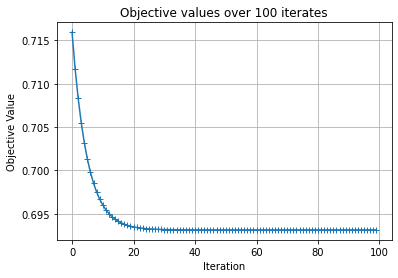

In [ ]:
plt.plot(history,'-+')
plt.grid(True) # add grid 
plt.title("Objective values over 100 iterates")
plt.xlabel("Iteration")
plt.ylabel("Objective Value")

**L-BFGS: logistic regression**

---
Consider a ridge-regularized logictic regression model for differentiating between two types of clothes. That is equivalent to minimizing the function
$𝐿(\beta)=\frac{1}{N}\sum_{i=1}^{𝑁}\log[1+𝑒^{−𝑦_{i}\langle x_{i},𝛽\rangle⟩}]+\frac{1}{N}\|\beta\|_{2}^{2}$
 

1.   Implement a Newton-algorithm for fitting the model.
2.   Use the scipy implementation of L-BFGS for fitting the model: https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html

Remark: For using L-BFGS, you may need to transform back JAX gradients into usual numpy vectors before feeding it to the L-BFGS function.


In [ ]:
import jax 
from jax.config import config
config.update('jax_enable_x64', True)
import os as os
import pylab as plt
import h5py # to read hdf5 files
import time
import scipy
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r"/content/drive/MyDrive/DSA4212"

filename = "fashion_img_training.h5"
fashion_img_training = h5py.File(os.path.join(path, filename),'r')['training_images'][:]

filename = "fashion_label_training.h5"
fashion_label_training = h5py.File(os.path.join(path, filename),'r')['training_labels'][:]

filename = "fashion_img_val.h5"
fashion_img_val = h5py.File(os.path.join(path, filename),'r')['val_images'][:]

filename = "fashion_label_val.h5"
fashion_label_val = h5py.File(os.path.join(path, filename),'r')['val_labels'][:]

In [ ]:
# x_train and x_val contains all the flattened 
# images 
x_train = fashion_img_training.reshape(10000,28*28)
y_train = fashion_label_training
x_val = fashion_img_val.reshape(2000,28*28)
y_val = fashion_label_val 

In [ ]:
np.random.seed(4212) # ensure reproducible 

In [ ]:
# Parameter for logistic regression 
# should scale the standard deviation based on size 
# to prevent inner product between beta and examples to be large 
beta = np.random.normal(0,1/np.sqrt(28*28),size = (28*28))

In [ ]:
def prediction(x,beta):
  return 1/(1 + jnp.exp(-jnp.dot(beta,x)))

Logistic Loss with regularization parameter (Ridge Regression)

---

$\frac{1}{n}\sum_{i=1}^{n}\log(1 + \exp(-y_{i}\langle \beta,x_{i}\rangle) + \frac{1}{N}\|\beta\|_{2}^{2}$


In [ ]:
# We want to compute the logistic loss at a single image 
@jax.jit
def loss_single(beta,x,y):
  return jnp.log(1 + jnp.exp(-y * jnp.dot(x,beta))) 

In [ ]:
vmapped_logistic_loss = jax.vmap(loss_single,in_axes = (None,0,0))

In [ ]:
@jax.jit
def all_logistic_loss(beta,x,y):
  return jnp.mean(vmapped_logistic_loss(beta,x,y)) 

In [ ]:
all_logistic_loss(beta,x_train,y_train)

DeviceArray(0.71672414, dtype=float64)

In [ ]:
loss_value_and_grad = jax.value_and_grad(all_logistic_loss) 
loss_hessian = jax.hessian(all_logistic_loss)
loss_grad = jax.grad(all_logistic_loss) 

**L-BFGS Algorithm**

**Example**

In [ ]:
# let us minimize this simple function
def func(x):
    """ F: R^p --> R"""
    return jnp.mean( jnp.sin(x)**2 )

grad_func = jax.jit(jax.grad(func))


In [ ]:
#let's create a wrapper to make sure the output is a standard numpy gradient
def gradient_wrapper(x):
    """ compute the gradient of func at x and make sure that the output is a numpy array"""
    return np.array(grad_func(x))

In [ ]:
x_init = jnp.array([1. ,2. , 3.])
gradient_wrapper(x_init)

array([ 0.30309914, -0.2522675 , -0.0931385 ])

In [ ]:
def loss_gradient_wrapper(beta):
  return np.array(loss_grad(beta,x_train,y_train))

In [ ]:
def loss_(beta):
  return all_logistic_loss(beta,x_train,y_train)

In [ ]:
loss_history = []  #to save the loss trajectory
time_history = []  #to save the compute time

def save_traj(beta):
    """ a function that saves a few statistics for later analysis"""
    loss_history.append(loss_(beta))
    time_history.append(time.time() - start)

start = time.time()
traj = scipy.optimize.minimize(fun = loss_, #functino to minimize
                                x0 = np.array(beta_init), #initial guess
                                method='L-BFGS-B',  #we want to use L-BFGS
                                jac=loss_gradient_wrapper, #function that computes the gradient
                                callback=save_traj, #a function used to save some results for later pltting
                                options={"maxiter":100})  #maximum number of iteration

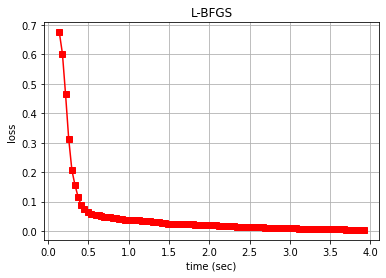

In [ ]:
plt.plot(time_history, loss_history, "r-s")
plt.xlabel("time (sec)")
plt.ylabel("loss")
plt.title("L-BFGS")
plt.grid(True)